# QAOA for Max Cut, Toy Example
In this notebook the QAOA method is used to solve a small max cut problem. The quantum circuit used is shown and the approximation ratio for depth = 1 is  computed. 

# Importing necessary modules

In [1]:
from qaoa import QAOA, problems, mixers, initialstates

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

# Creating problem instance

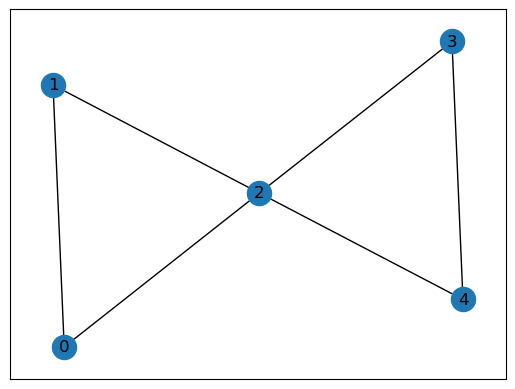

In [3]:
V = np.arange(0,5,1)
E = [(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 

G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)
k_cuts=2

# Creating a QAOA instance and drawing the quantum circuit
Below the quantum circuit for the QAOA method is shown. The circuit corresponds to preparation of the $\gamma$ and $\beta$ dependent state: $|\gamma, \beta\rangle = e^{-iH_{M}\beta}e^{-iH_C\gamma}|0\rangle $, where $|0\rangle$ is the equal superposition over all computational basis states prepared by the hadamard gates. $H_M$ and $H_C$ are the standar X-mixer and the cost hamiltonian respectively.

In [8]:
qaoamc = QAOA(
    initialstate=initialstates.Plus(),
    problem=problems.MaxCut(G=G),
    mixer=mixers.X()
)

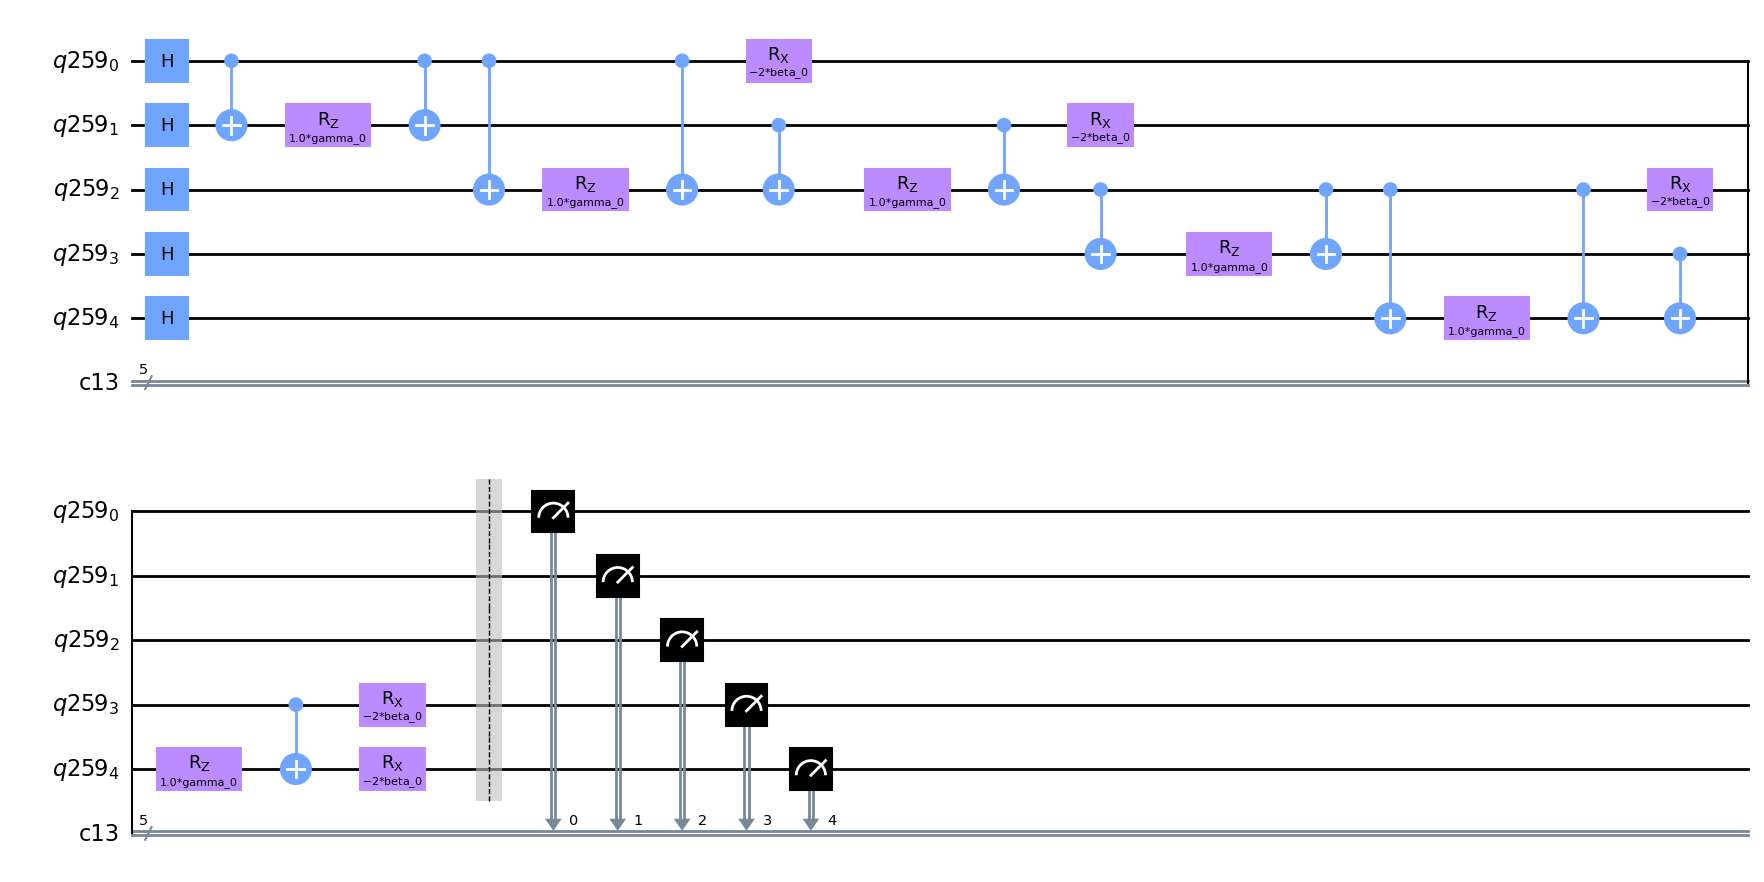

In [18]:
qaoamc.createParameterizedCircuit(1) #createParameterizedCircuit(depth) must be called to create circuit before drawing.
qaoamc.parameterized_circuit.draw(output = 'mpl')
# qaoamc.initialstate.circuit.draw('mpl')
# qaoamc.mixer.circuit.draw('mpl')
# qaoamc.problem.circuit.draw('mpl')

# Sample and plot cost landscape

The cost landscape is sampled using angles $\gamma, \beta$ $\in$ $[0, \frac{\pi}{2}]$. In the plot a maximum and minimum of the cost function is seen. The cost landscape is periodic with period $\frac{\pi}{2}$ in $\beta$.

2023-09-18 20:48:34 [info     ] Calculating energy landscape for depth p=1... file=qaoa.qaoa func=sample_cost_landscape
2023-09-18 20:48:34 [info     ] Executing sample_cost_landscape file=qaoa.qaoa func=sample_cost_landscape
2023-09-18 20:48:34 [info     ] parameters: 2                  file=qaoa.qaoa func=sample_cost_landscape
2023-09-18 20:48:34 [info     ] Done execute                   file=qaoa.qaoa func=sample_cost_landscape
2023-09-18 20:48:34 [info     ] Done measurement               file=qaoa.qaoa func=sample_cost_landscape
2023-09-18 20:48:34 [info     ] Calculating Energy landscape done file=qaoa.qaoa func=sample_cost_landscape


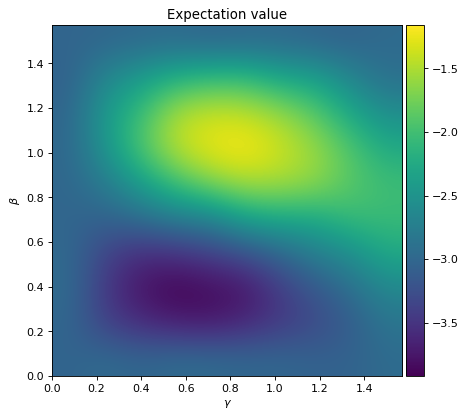

In [5]:
qaoamc.sample_cost_landscape(angles={"gamma": [0,np.pi/2,10], "beta": [0,np.pi/2,10]})
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='bicubic',origin='lower',extent=[0,np.pi/2,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

# Search for the best parameters at depth = 1 and plot histogram
The values for the parameters $\gamma$ and $\beta$ are found by the optimizer, and the circuit is then measured 2048 times. The measurement outcomes are seen in the histogram below.

2023-09-18 20:48:34 [info     ] cost(depth 1 = -3.9511718749999996 file=qaoa.qaoa func=increase_depth


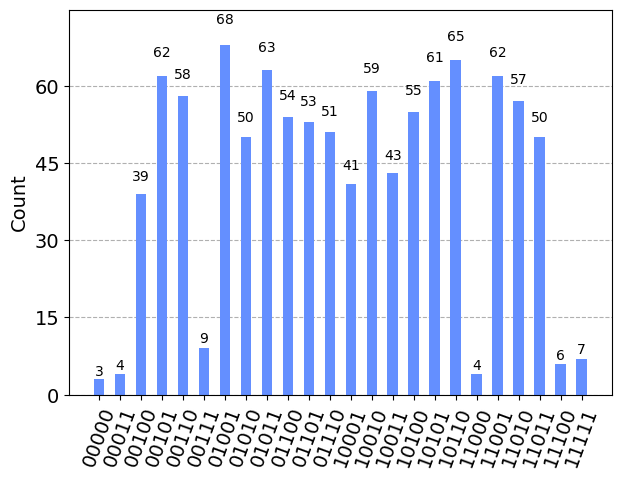

In [6]:
qaoamc.increase_depth() #Search for the best parameters at depth = 1
histogram = qaoamc.hist(qaoamc.angles_hist['d'+str(1)+'_final']) 
plot_histogram(histogram)


# Compute and print approximation ratio
Below the approximation ratio is found using that the maximum cut for the given problem is 4.

In [7]:
best_cost = 4
print("approximation ratio=", -list(qaoamc.costval.values())[0]/best_cost) 

approximation ratio= 0.9877929687499999
